<a href="https://colab.research.google.com/github/iatharva25/ml-practicals/blob/main/Concerete_compressive_Strength_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# data (as pandas dataframes)
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets

# metadata
print(concrete_compressive_strength.metadata)

# variable information
print(concrete_compressive_strength.variables)

{'uci_id': 165, 'name': 'Concrete Compressive Strength', 'repository_url': 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength', 'data_url': 'https://archive.ics.uci.edu/static/public/165/data.csv', 'abstract': 'Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. ', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1030, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Concrete compressive strength'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5PK67', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 383, 'type': 'NATIVE', 'title': 'Modeling of strength of high-performance concrete using artificial neural networks', 'authors': 'I. Yeh', 'venue': 'C

In [ ]:
data = pd.concat([X, y], axis=1)

In [ ]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
data.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Concrete compressive strength,0


In [ ]:
data.shape

(1030, 9)

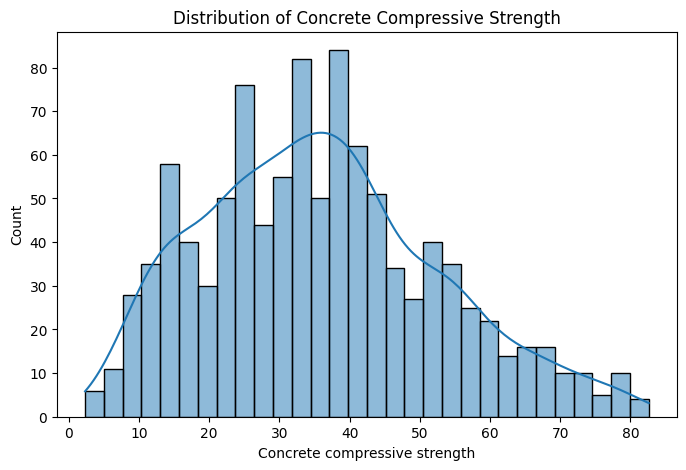

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Concrete compressive strength'], bins=30, kde=True)
plt.title('Distribution of Concrete Compressive Strength')
plt.show()

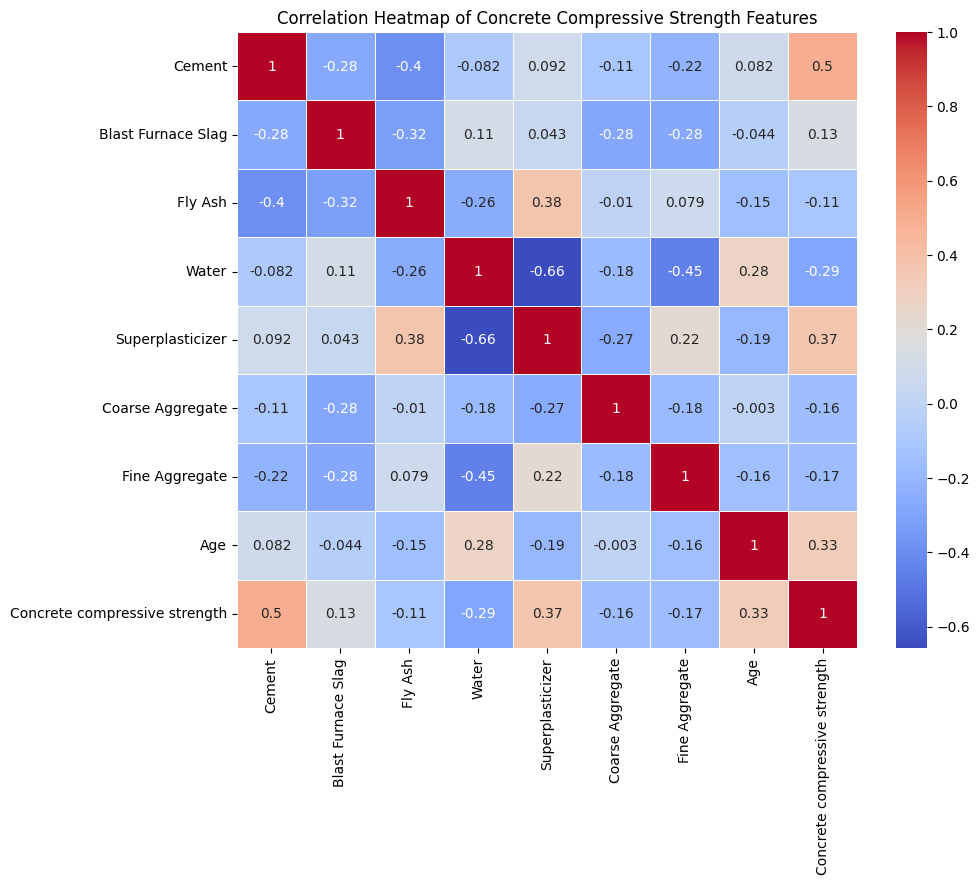

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Concrete Compressive Strength Features')
plt.show()

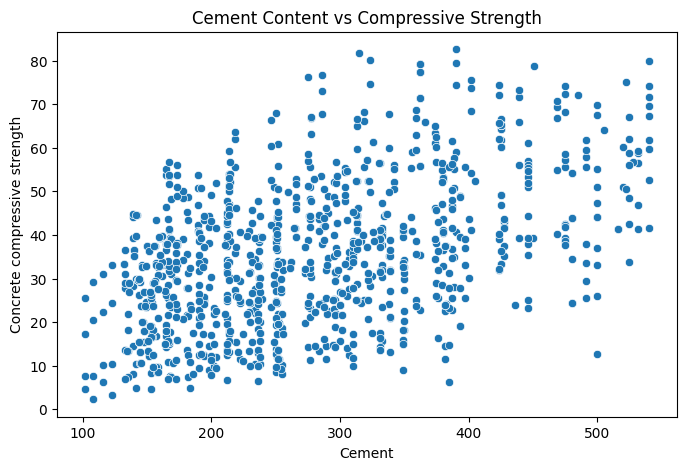

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Cement'], y=data['Concrete compressive strength'])
plt.title('Cement Content vs Compressive Strength')
plt.show()

In [ ]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [ ]:
y

,Concrete compressive strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30
...,...
1025,44.28
1026,31.18
1027,23.70
1028,32.77


In [ ]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Standardising the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
svm_regressor = SVR()

In [ ]:
svm_regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_pred = svm_regressor.predict(X_test)

In [ ]:
y_pred

array([42.02837189, 53.07178175, 55.4244467 , 52.25058179, 27.15432674,
       41.22365799, 26.95118384, 47.40291511, 31.32277358, 43.28318885,
       34.6409369 , 20.64832546, 46.85470404, 44.67936286, 26.7697804 ,
       34.53273197, 31.99436603, 25.82984409, 33.88688392, 27.83015034,
       32.0766513 , 37.40398295, 41.39953655, 26.31465017, 31.75662963,
       35.14831839, 16.7140779 , 45.70059883, 44.53785265, 22.78996674,
       37.58345848, 33.15714416, 39.86020844, 46.99425817, 25.63722485,
       35.14087252, 30.44223862, 41.21976612, 21.01493474, 41.87018131,
       19.44796208, 19.65825568, 33.41468603, 47.23060742, 19.46405782,
       61.1972441 , 42.85999254, 39.01843491, 22.32984782, 21.63059085,
       42.85887622, 40.46806868, 30.82688732, 28.15760928, 42.06606084,
       51.34657107, 28.70469115, 17.85449175, 34.87772226, 21.08940793,
       40.98866094, 26.54925385, 40.0213611 , 55.33368625, 23.88083109,
       26.88969139, 34.53063954, 22.45847868, 28.91575364, 24.33

In [ ]:
mse = mean_squared_error(y_test, y_pred)

In [ ]:
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 88.9594
R-squared: 0.6548


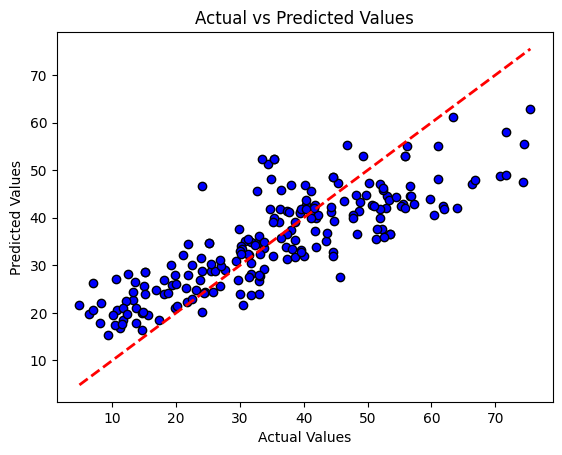

In [ ]:
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()